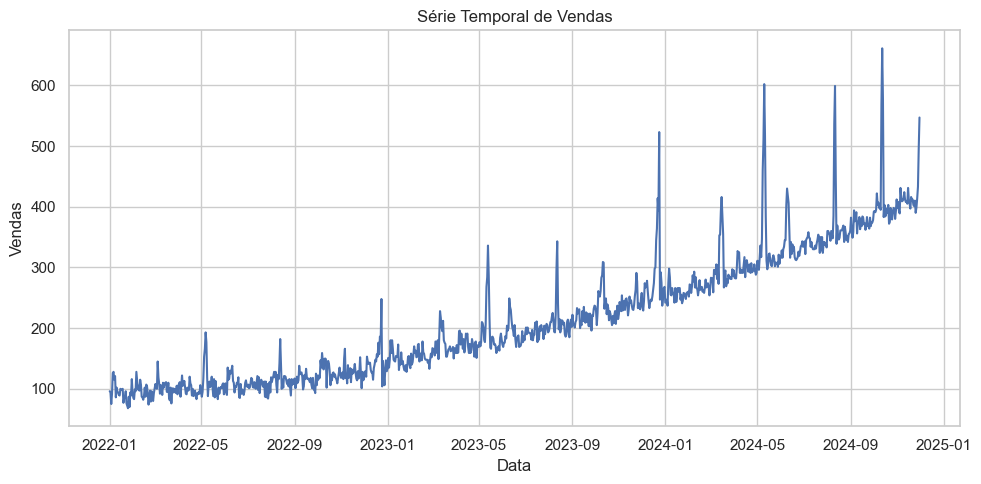

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo
caminho_arquivo = r"C:\Users\Home\OneDrive\Área de Trabalho\Análise Preditiva\Dataset.xlsx"

# Lê o Excel e já converte a coluna 'datas' para datetime
df = pd.read_excel(caminho_arquivo, parse_dates=["datas"])

# Ordena os dados por data
df.sort_values("datas", inplace=True)

# Garante que o índice seja a data (opcional, mas útil para séries temporais)
df.set_index("datas", inplace=True)

# ----------------------------------------
# 1. Série temporal com as vendas
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["vendas"])
plt.title("Série Temporal de Vendas")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.grid(True)
plt.tight_layout()
plt.show()


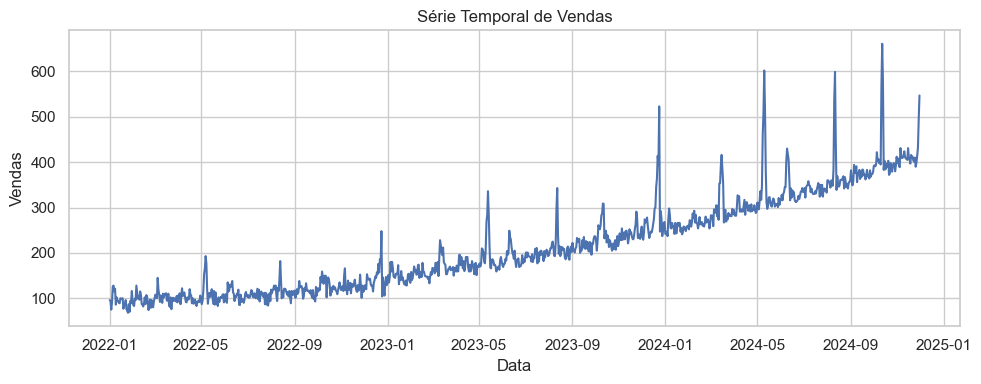

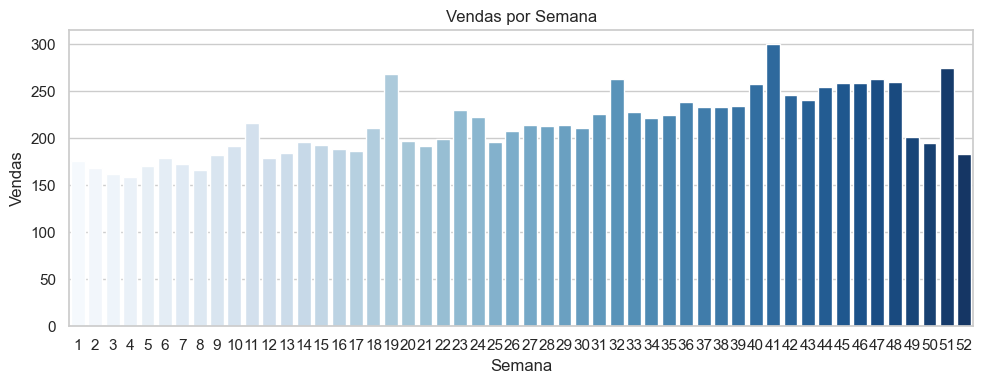

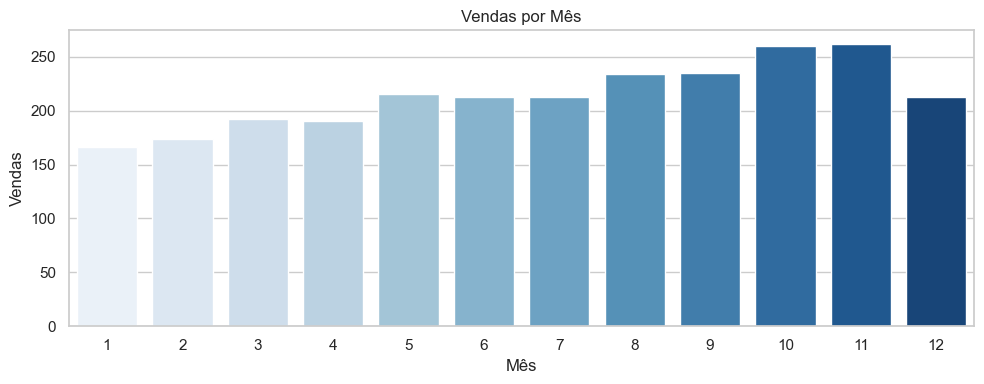

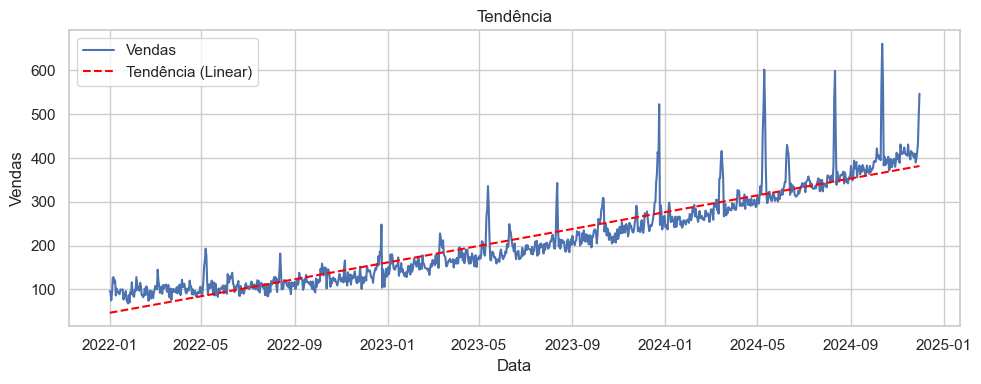

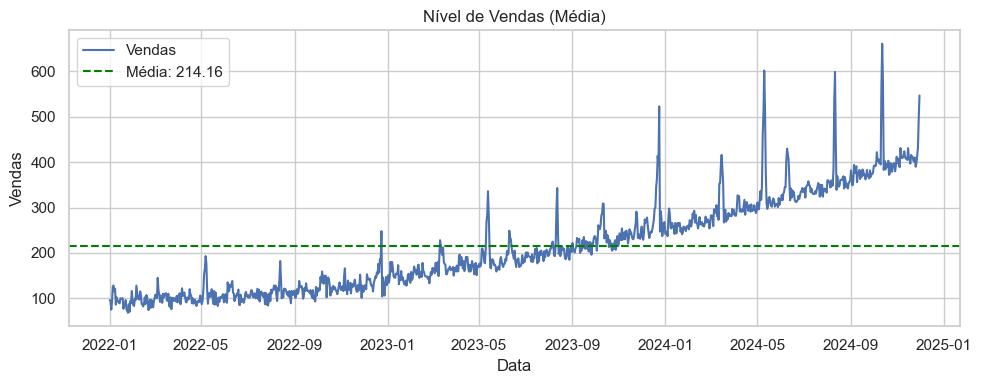

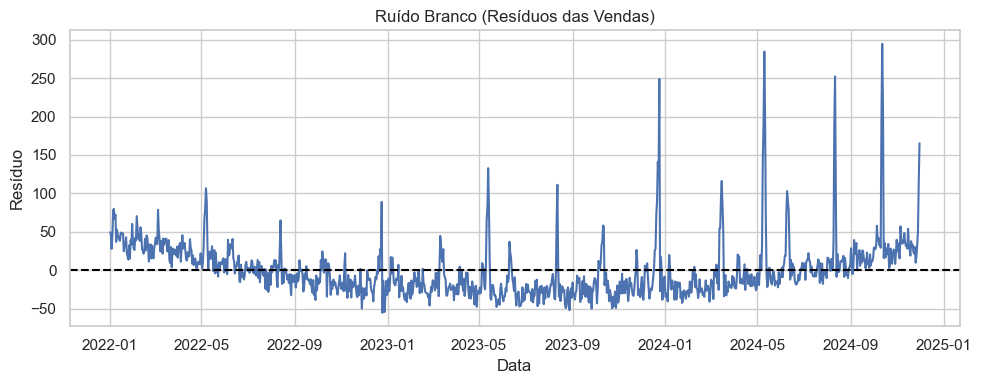

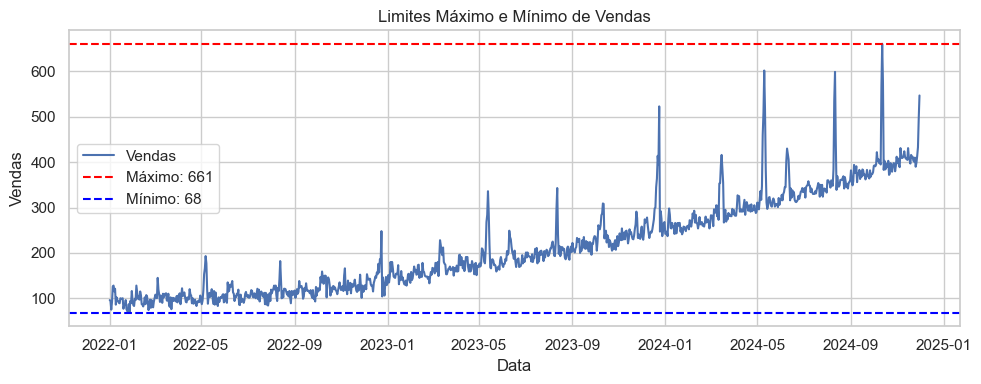

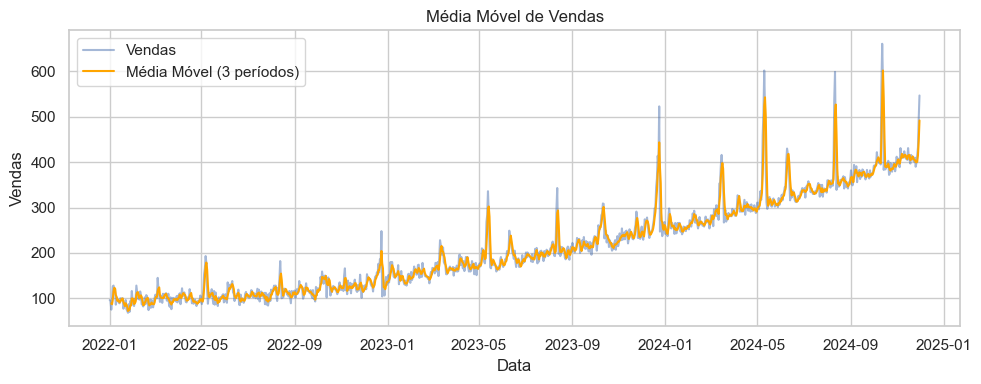

Média das vendas: 214.16
Desvio padrão das vendas: 103.57
Valor máximo: 661.00
Valor mínimo: 68.00


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Caminho do arquivo Excel
caminho_arquivo = r"C:\Users\Home\OneDrive\Área de Trabalho\Análise Preditiva\Dataset.xlsx"

# Lê o Excel com conversão automática da coluna 'datas' para datetime
df = pd.read_excel(caminho_arquivo, parse_dates=["datas"])

# Ordena os dados por data
df.sort_values("datas", inplace=True)

# Define a coluna de datas como índice
df.set_index("datas", inplace=True)

# Cria colunas auxiliares para análise semanal e mensal
df["semana"] = df.index.isocalendar().week
df["mes"] = df.index.month

# ------------------ GRÁFICO 1: Série Temporal ------------------
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["vendas"])
plt.title("Série Temporal de Vendas")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------ GRÁFICO 2: Vendas por Semana ------------------
plt.figure(figsize=(10, 4))
sns.barplot(x="semana", y="vendas", data=df, ci=None, palette="Blues")
plt.title("Vendas por Semana")
plt.xlabel("Semana")
plt.ylabel("Vendas")
plt.tight_layout()
plt.show()

# ------------------ GRÁFICO 3: Vendas por Mês ------------------
plt.figure(figsize=(10, 4))
sns.barplot(x="mes", y="vendas", data=df, ci=None, palette="Blues")
plt.title("Vendas por Mês")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.tight_layout()
plt.show()

# ------------------ GRÁFICO 4: Tendência (Regressão Linear) ------------------
from sklearn.linear_model import LinearRegression

# Cria uma coluna numérica representando o tempo (dias)
df["tempo"] = np.arange(len(df))

# Ajusta um modelo de regressão
X = df["tempo"].values.reshape(-1, 1)
y = df["vendas"].values
modelo = LinearRegression()
modelo.fit(X, y)
tendencia = modelo.predict(X)

plt.figure(figsize=(10, 4))
plt.plot(df.index, df["vendas"], label="Vendas")
plt.plot(df.index, tendencia, label="Tendência (Linear)", color="red", linestyle="--")
plt.title("Tendência")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------ GRÁFICO 5: Nível Médio de Vendas ------------------
media_geral = df["vendas"].mean()

plt.figure(figsize=(10, 4))
plt.plot(df.index, df["vendas"], label="Vendas")
plt.axhline(media_geral, color="green", linestyle="--", label=f"Média: {media_geral:.2f}")
plt.title("Nível de Vendas (Média)")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.legend()
plt.tight_layout()
plt.show()

# ------------------ GRÁFICO 6: Ruído Branco (vendas - tendência) ------------------
residuos = df["vendas"] - tendencia

plt.figure(figsize=(10, 4))
plt.plot(df.index, residuos)
plt.title("Ruído Branco (Resíduos das Vendas)")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Data")
plt.ylabel("Resíduo")
plt.tight_layout()
plt.show()

# ------------------ GRÁFICO 7: Limites Máximo e Mínimo ------------------
maximo = df["vendas"].max()
minimo = df["vendas"].min()

plt.figure(figsize=(10, 4))
plt.plot(df.index, df["vendas"], label="Vendas")
plt.axhline(maximo, color="red", linestyle="--", label=f"Máximo: {maximo}")
plt.axhline(minimo, color="blue", linestyle="--", label=f"Mínimo: {minimo}")
plt.title("Limites Máximo e Mínimo de Vendas")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.legend()
plt.tight_layout()
plt.show()

# ------------------ GRÁFICO 8: Média Móvel ------------------
df["media_movel"] = df["vendas"].rolling(window=3).mean()

plt.figure(figsize=(10, 4))
plt.plot(df.index, df["vendas"], label="Vendas", alpha=0.5)
plt.plot(df.index, df["media_movel"], label="Média Móvel (3 períodos)", color="orange")
plt.title("Média Móvel de Vendas")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.legend()
plt.tight_layout()
plt.show()

# ------------------ MÉTRICAS ESTATÍSTICAS ------------------
print(f"Média das vendas: {df['vendas'].mean():.2f}")
print(f"Desvio padrão das vendas: {df['vendas'].std():.2f}")
print(f"Valor máximo: {df['vendas'].max():.2f}")
print(f"Valor mínimo: {df['vendas'].min():.2f}")


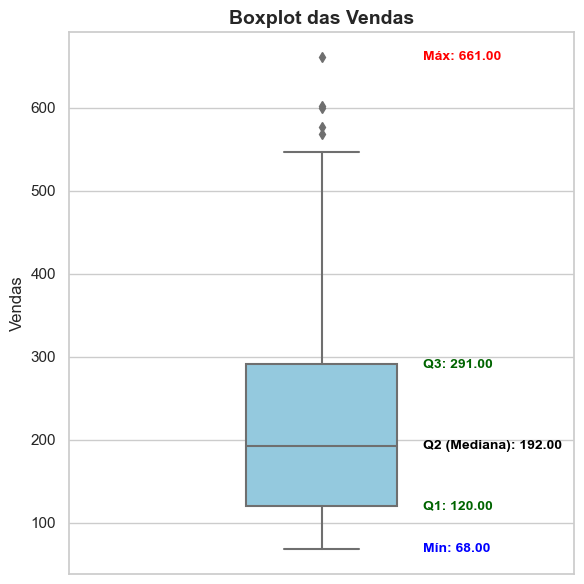

In [42]:
# ------------------ GRÁFICO 9: Boxplot com estatísticas descritivas ------------------
plt.figure(figsize=(6, 6))
sns.boxplot(y=df["vendas"], color="skyblue", width=0.3)
plt.title("Boxplot das Vendas", fontsize=14, fontweight='bold')
plt.ylabel("Vendas", fontsize=12)

# Estatísticas principais
q1 = df["vendas"].quantile(0.25)
q2 = df["vendas"].median()
q3 = df["vendas"].quantile(0.75)
minimo = df["vendas"].min()
maximo = df["vendas"].max()

# Coordenada horizontal para o texto à direita do boxplot
x_text = 0.2

# Anotações com alinhamento à direita e fonte estilizada
plt.text(x_text, minimo, f'Mín: {minimo:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='blue')
plt.text(x_text, q1, f'Q1: {q1:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='darkgreen')
plt.text(x_text, q2, f'Q2 (Mediana): {q2:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='black')
plt.text(x_text, q3, f'Q3: {q3:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='darkgreen')
plt.text(x_text, maximo, f'Máx: {maximo:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='red')

plt.tight_layout()
plt.show()